In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats
import csv
import pylab as pl
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable as pt
from collections import Counter as ct

In [32]:
with open(r"/home/cslab/data_new.csv", "r") as f:
    reader = csv.reader(f)
    mylist = list(reader)

In [33]:
np_list = np.array(mylist)
pgd = np.column_stack(np_list)

In [34]:
# Individual Features in the Dataset
data_id = np.array(list(map(int, pgd[0]))) # Unique Numeric Identifiers 
test_name = pgd[1] # Code name of test participants
num_subj = pgd[2] # Number of subjects {4}
attempt = np.array(list(map(int, pgd[3]))) # Number of attempts {40}
score = score = np.array(list(map(int, pgd[4]))) # Test Score {40}
name = pgd[5] # Real names
sex = pgd[6] # Sexes
state = pgd[7] # States of Origin
age = np.array(list(map(int, pgd[8]))) # Ages
phone = pgd[9] # Phone Numbers
email = pgd[10] # Email addresses
kin_phone = pgd[11]
kin_email = pgd[12]
kin_add = pgd[13]
subj1 = pgd[14] # First Subject
subj1_score = np.array(list(map(int, pgd[15]))) # Score {100}
subj2 = pgd[16] # Second Subject
subj2_score = np.array(list(map(int, pgd[17]))) # Score {100}
subj3 = pgd[18] # Third Subject
subj3_score = np.array(list(map(int, pgd[19]))) # Score {100}
subj4 = pgd[20] # Fourth Subject
subj4_score = np.array(list(map(int, pgd[21]))) # Score {100}
grand_total = np.array(list(map(int, pgd[22]))) # Total Score Score {400}
faculty = pgd[23] # Faculty {8 Types}
course = pgd[24] # Course of Study {51 Types}
lga = pgd[25] # Local Government Area {205 Types}

In [6]:
## PostUTME Score Plots
# Score Array
print (score)

[20 12 15 ... 15 18 19]


In [ ]:
# Line Plot
plt.figure(figsize=(20,6))
plt.plot(data_id, score, c='purple')
plt.title('Candidates\' individual scores', fontsize=20)
plt.xlabel('Candidates', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
# Scatter Plot
plt.scatter(data_id, score)
plt.title('Candidates\' individual scores')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.show()

In [ ]:
# Dynamic bins for histogram with discrete values
d = np.diff(np.unique(score)).min()
score_lower = score.min() - float(d) / 2
score_upper = score.max() + float(d) / 2
bins = np.arange(score_lower, score_upper + d, d)

In [ ]:
# Yellow-centered histogram
N, ibins, patches = plt.hist(score, bins=bins, edgecolor='white', linewidth=0.85)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

In [ ]:
# Colored Histogram
fig, pg = plt.subplots()
N, bins, patches = pg.hist(score, bins=bins, edgecolor='white', linewidth=1)
palette = pl.get_cmap('jet', len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(palette(i))

In [ ]:
## UTME Score Plots
# Score Array
print (jamb_total)

In [ ]:
# Line Plot
plt.plot(data_id, jamb_total)
plt.title('Candidates\' individual scores')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.show()

In [ ]:
# Scatter Plot
plt.scatter(data_id, jamb_total)
plt.title('Candidates\' individual scores')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.show()

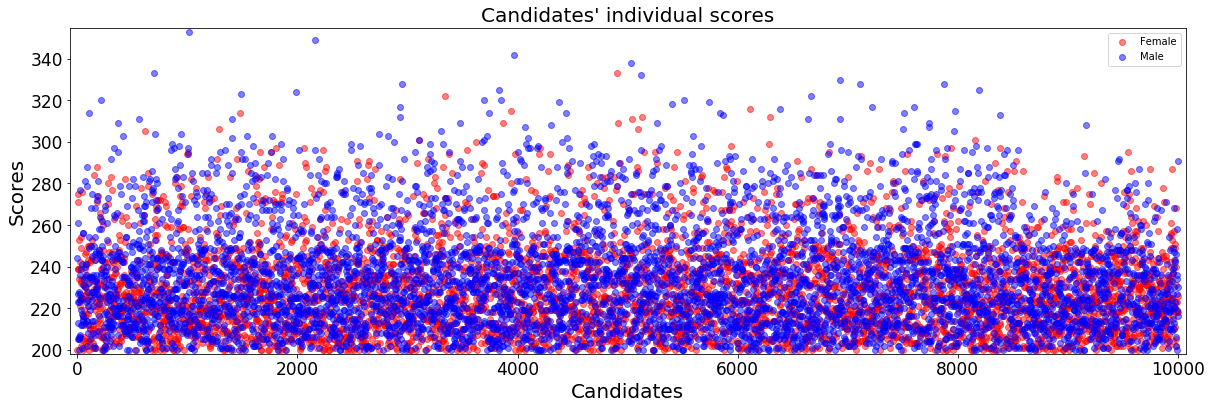

In [15]:
# Scatter Plots showing JAMB Scores classified by sex
unique_sex = np.unique(sex)
sex_cls = np.where(sex == 'M', 'blue', 'red')
plt.figure(figsize=(20,6))
plt.scatter(data_id[sex != 'M'],\
            grand_total[sex != 'M'], c='red', alpha=0.5, label='Female')
plt.scatter(data_id[sex == 'M'],\
            grand_total[sex == 'M'], c='blue', alpha=0.5, label='Male')
#plt.scatter(data_id, grand_total, c=sex_cls, alpha=0.77)
plt.title('Candidates\' individual scores', fontsize=20)
plt.xlabel('Candidates', fontsize=20)
plt.ylabel('Scores', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend()
plt.margins(x=0.004,y=0.004)
plt.show()

TypeError: 'Text' object is not callable

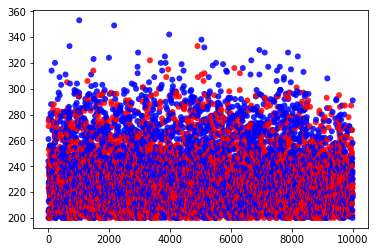

<Figure size 1440x432 with 0 Axes>

In [7]:
# Scatter Plots showing JAMB Scores classified by sex
unique_sex = np.unique(sex)
sex_cls = np.where(sex == 'M', 'blue', 'red')

fig, ax = plt.subplots()
plt.figure(figsize=(20,6))
i = 0
ax.scatter(data_id, grand_total, c=sex_cls, label=sex_cls,
               alpha=0.85, edgecolors='none')
ax.title('Candidates\' individual scores', fontsize=20)
ax.xlabel('Candidates', fontsize=20)
ax.ylabel('Scores', fontsize=20)
ax.xticks(fontsize=17)
ax.yticks(fontsize=17)
ax.legend()
ax.grid(True)

plt.show()

In [160]:
sex_cls = np.where(sex == 'M', 'blue', 'red')
print(sex_cls)





['blue' 'red' 'blue' ... 'blue' 'blue' 'blue']


In [ ]:
# Scatter Plots showing JAMB Scores classified by faculty
unique_fac = np.unique(faculty)
# fac_cls = np.where(sex == 'M', 'blue', 'red']
fac_cls = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'firebrick', 'darkslateblue', 'gold']
# ['red', 'blue', 'green']
plt.figure(figsize=(20,6))
plt.scatter(data_id, jamb_total, c=fac_cls, alpha=0.77)
plt.title('Candidates\' individual scores')
plt.xlabel('Candidates')
plt.ylabel('Scores')
plt.show()

In [36]:
# Dynamic bins for histogram with discrete values
d = np.diff(np.unique(grand_total)).min()
score_lower = grand_total.min() - float(d) / 2
score_upper = grand_total.max() + float(d) / 2
bins = np.arange(score_lower, score_upper + d, d)
#bins /= 2

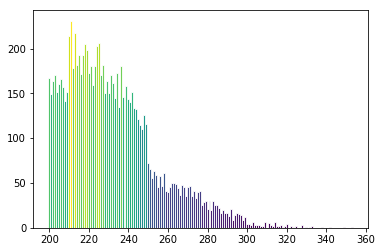

In [37]:
# Yellow-centered histogram
N, ibins, patches = plt.hist(grand_total, bins=bins, edgecolor='white', linewidth=0.85)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

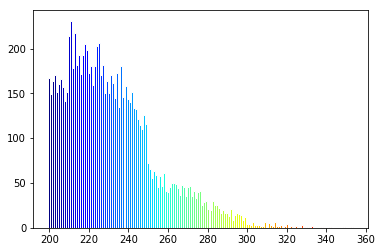

In [38]:
# Colored Histogram
fig, pg = plt.subplots()
N, bins, patches = pg.hist(grand_total, bins=bins, edgecolor='white', linewidth=1)
palette = pl.get_cmap('jet', len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(palette(i))

In [39]:
age_d = np.diff(np.unique(age)).min()
age_lower = age.min() - float(age_d) / 2
age_upper = age.max() + float(age_d) / 2
age_bin = np.arange(age_lower, age_upper + age_d, age_d)

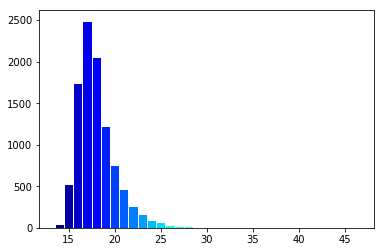

In [40]:
# Colored Histogram
fig, age_dist = plt.subplots()
N, bins, patches = age_dist.hist(age, bins=age_bin, edgecolor='white', linewidth=1)
palette = pl.get_cmap('jet', len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(palette(i))

In [ ]:
## Preliminary data insights
# Dataset Size
print(id.shape)
print(len(id))

In [158]:
# PostUTME Scores
min_score = np.min(score)
max_score = np.max(score)
mean_score = np.mean(score)
median_score = np.median(score)
modal_score = int(stats.mode(score)[0])
std_score = np.std(score)
# Correlation Coefficient between UTME and PostUTME
correlation = np.corrcoef(score, grand_total)
# Number of passes
putme_pass = len(score[score >= 20])
putme_fail = len(score[score < 20])
print(min_score, max_score, mean_score, median_score, modal_score, std_score)
print(putme_pass, putme_fail)

0 38 18.26007399260074 18.0 18 4.963808096153899
3833 6168


In [ ]:
# UTME Scores
min_utme = np.min(jamb_total)
max_utme = np.max(jamb_total)
mean_utme = np.mean(jamb_total)
median_utme = np.median(jamb_total)
modal_utme = int(stats.mode(jamb_total)[0])
std_utme = np.std(jamb_total)

In [ ]:
# Ages
min_age = np.min(age)
max_age = np.max(age)
mean_age = np.mean(age)
median_age = np.median(age)
modal_age = int(stats.mode(age)[0])
std_age = np.std(age)

In [ ]:
unique_age = np.unique(age, return_counts=True)
unique_age_freq = unique_age[1]
unique_age = unique_age[0]

In [ ]:
# Analysis based on age groups
cls = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'firebrick', 'darkslateblue', 'gold', 'deepskyblue', 'yellow', 'cornflowerblue', 'darkseagreen', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'firebrick', 'thistle', 'gold', 'deepskyblue', 'yellow', 'cornflowerblue', 'darkseagreen', 'aquamarine']

indi = 0
age_group = []
ave_ages = []
for bracket in np.unique(age):
    age_group.append(score[age == bracket])
    ave_ages.append(np.mean(score[age == bracket])) 

In [ ]:
age_group = np.array(age_group)
ave_ages = np.array(ave_ages)
plt.figure(figsize=(30,4))
plt.xticks(unique_age)
plt.yticks(np.rint(ave_ages))
plt.scatter(unique_age, ave_ages, c=cls, s=unique_age_freq*5, alpha=0.85, marker='o', linewidths=0)
plt.show()

In [ ]:
# Line Graph for unique ages
plt.figure(figsize=(30,4))
plt.xticks(unique_age)
plt.plot(unique_age, ave_ages)
plt.show()

In [ ]:
# Analysis based on States
unique_state = np.unique(state, return_counts=True)
state_freq = unique_state[1]
unique_state = unique_state[0]
state_score = []
ave_state = []
for this_state in unique_state:
    state_score.append(score[state == this_state])
    ave_state.append(np.mean(score[state == this_state]))

In [ ]:
# Scatterplot
plt.figure(figsize=(30,4))
plt.xticks(rotation='vertical')
plt.yticks(np.rint(ave_state))
plt.scatter(unique_state, ave_state, c=cls, s=state_freq*2.5, alpha=1, marker='o')
plt.show()

In [ ]:
# Line Graph
plt.figure(figsize=(30,4))
plt.xticks(rotation='vertical')
plt.yticks(np.rint(ave_state))
plt.plot(unique_state, ave_state)
plt.show()

In [ ]:
# Correlation between PUTME Scores and UTME
unique_putme = np.unique(score)
utme_avgs = []

for single_score in unique_putme:
    utme_avgs.append(np.mean(jamb_total[score == single_score]))
plt.scatter(unique_putme, utme_avgs)
plt.show()

In [ ]:
print(sorted(data_id))

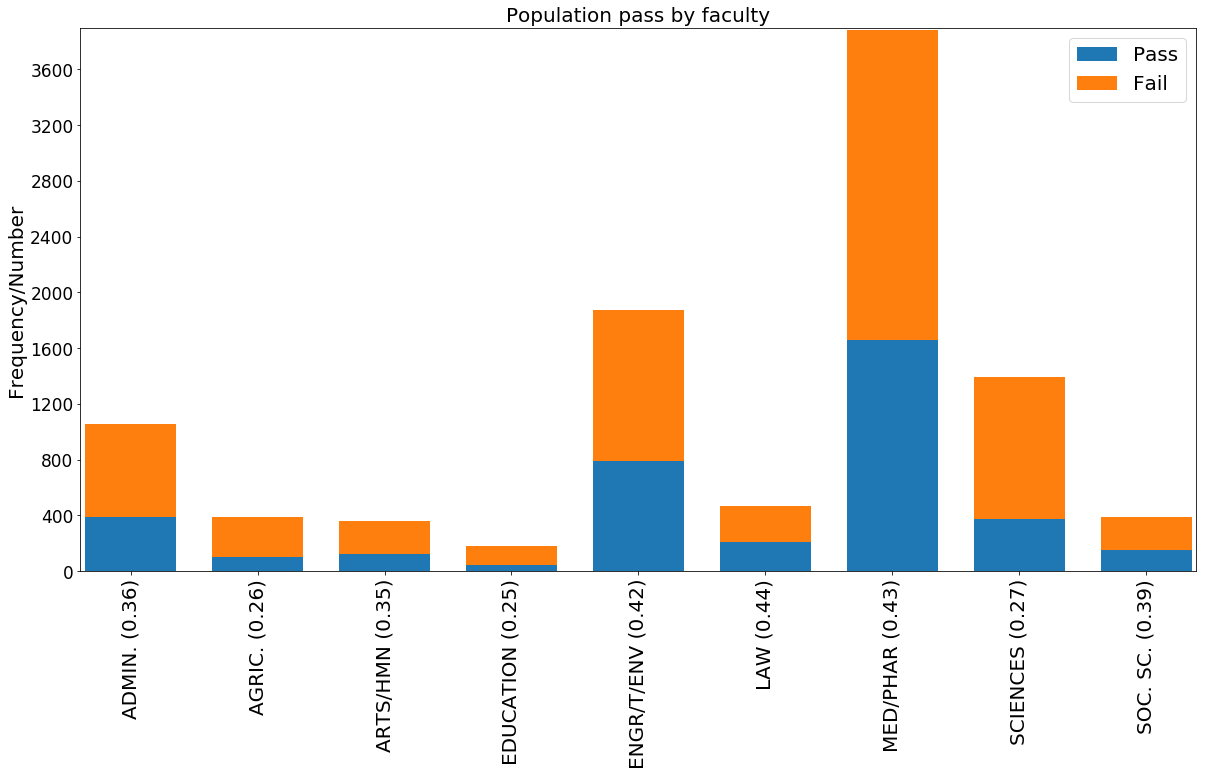

In [41]:
# Analysis based on Faculties
N = 9
unique_fac = np.unique(faculty, return_counts=True)
fac_freq = unique_fac[1]
unique_fac = unique_fac[0]
ind = np.arange(N)
width = 0.72  

putme_pass = score >= 20

fac_pass = []

for single_fac in unique_fac:
    fac_pass.append(len(np.extract((putme_pass)\
                                   & (faculty == single_fac), score)))
fac_pass = np.array(fac_pass)

fac_prop = (fac_pass/fac_freq)
mylist = []
i = 0
for athing in unique_fac:
    mylist.append(athing + ' (' + str(round(fac_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, fac_pass, width)
p2 = plt.bar(ind, fac_freq-fac_pass, width,
             bottom=fac_pass)

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population pass by faculty', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=20)
plt.yticks(np.arange(0, 4001, 400), fontsize=17)
plt.legend((p1[0], p2[0]), ('Pass', 'Fail'), fontsize=20)

plt.margins(x=0.004,y=0.004)
plt.show()

In [55]:
m = len(score[sex=='M'])
f = len(score[sex=='F'])
# print(m, f, round(((m-f)/m)*100, 2))
print(f/m)

0.853409933283914


In [56]:
m = len(np.extract((sex=='M') & (score >= 20), score))
f = len(np.extract((sex=='F') & (score >= 20), score))
# print(m, f, round(((m-f)/m)*100, 2))
print(f/m)

0.6723385689354275


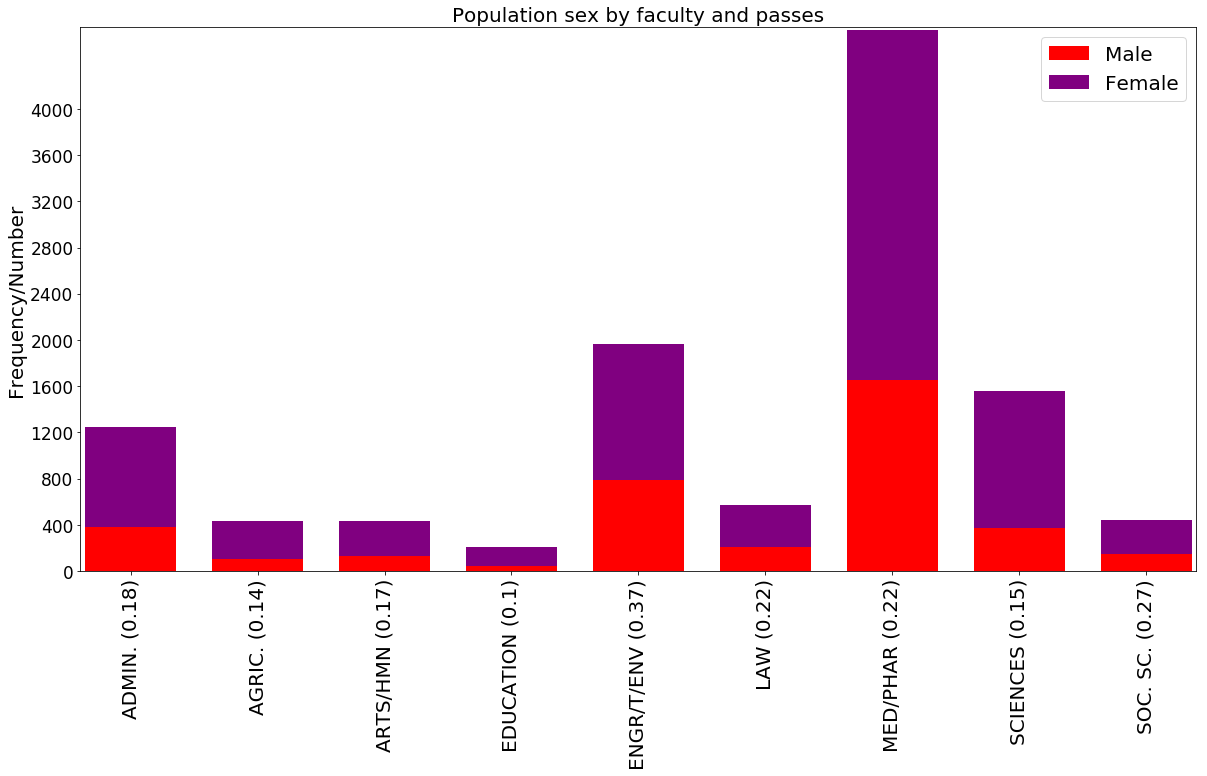

In [42]:
# Analysis based on Faculties
N = 9
unique_fac = np.unique(faculty, return_counts=True)
fac_freq = unique_fac[1]
unique_fac = unique_fac[0]
ind = np.arange(N)
width = 0.72  

putme_male = sex == 'M'

fac_male = []

for single_fac in unique_fac:
    fac_male.append(len(np.extract((putme_male)\
    & (faculty == single_fac) & (score >= 20), score)))
fac_male = np.array(fac_male)

fac_prop = (fac_male/fac_freq)
mylist = []
i = 0
for athing in unique_fac:
    mylist.append(athing + ' (' + str(round(fac_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, fac_pass, width, color='r')
p2 = plt.bar(ind, fac_freq-fac_male, width,
             bottom=fac_pass, color='purple')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by faculty and passes', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=20)
plt.yticks(np.arange(0, 4001, 400), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.margins(x=0.004,y=0.004)
plt.show()

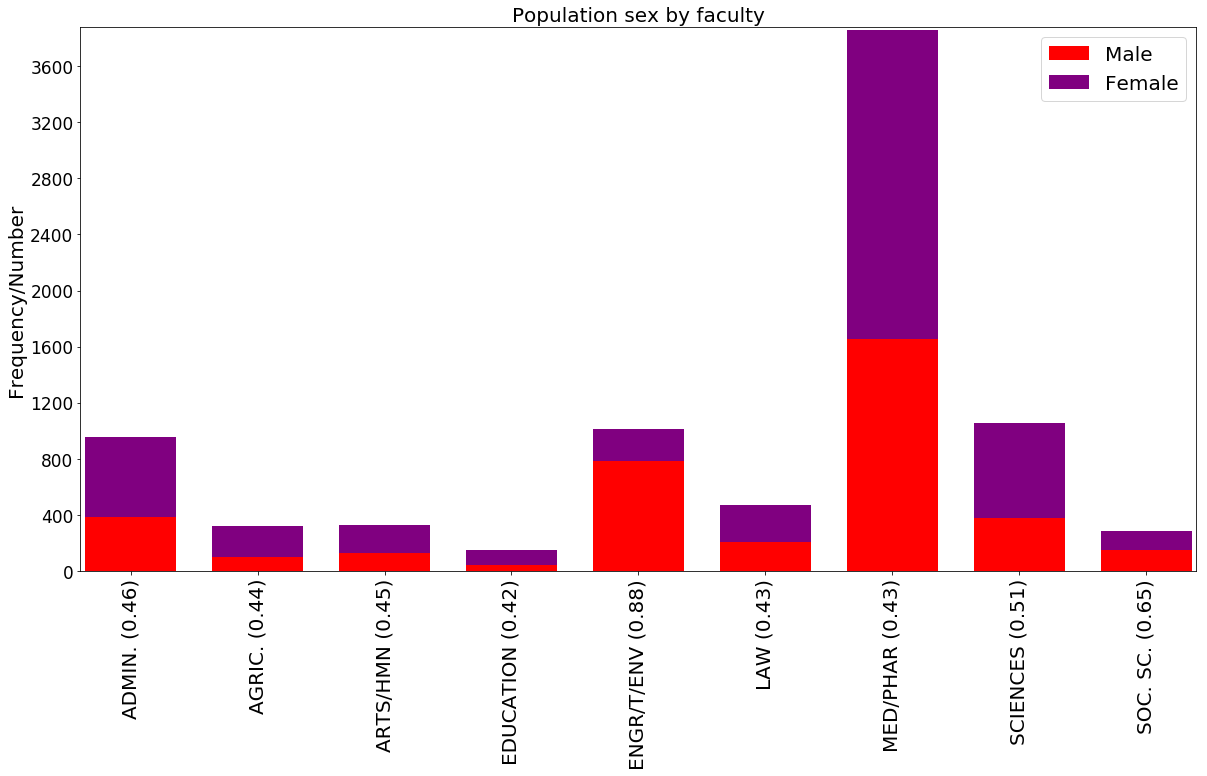

In [43]:
# Analysis based on Faculties
N = 9
unique_fac = np.unique(faculty, return_counts=True)
fac_freq = unique_fac[1]
unique_fac = unique_fac[0]
ind = np.arange(N)
width = 0.72  

putme_male = sex == 'M'

fac_male = []

for single_fac in unique_fac:
    fac_male.append(len(np.extract((putme_male)\
                                   & (faculty == single_fac), score)))
fac_male = np.array(fac_male)

fac_prop = (fac_male/fac_freq)
mylist = []
i = 0
for athing in unique_fac:
    mylist.append(athing + ' (' + str(round(fac_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, fac_pass, width, color='r')
p2 = plt.bar(ind, fac_freq-fac_male, width,
             bottom=fac_pass, color='purple')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by faculty', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=20)
plt.yticks(np.arange(0, 4001, 400), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.margins(x=0.004,y=0.004)
plt.show()

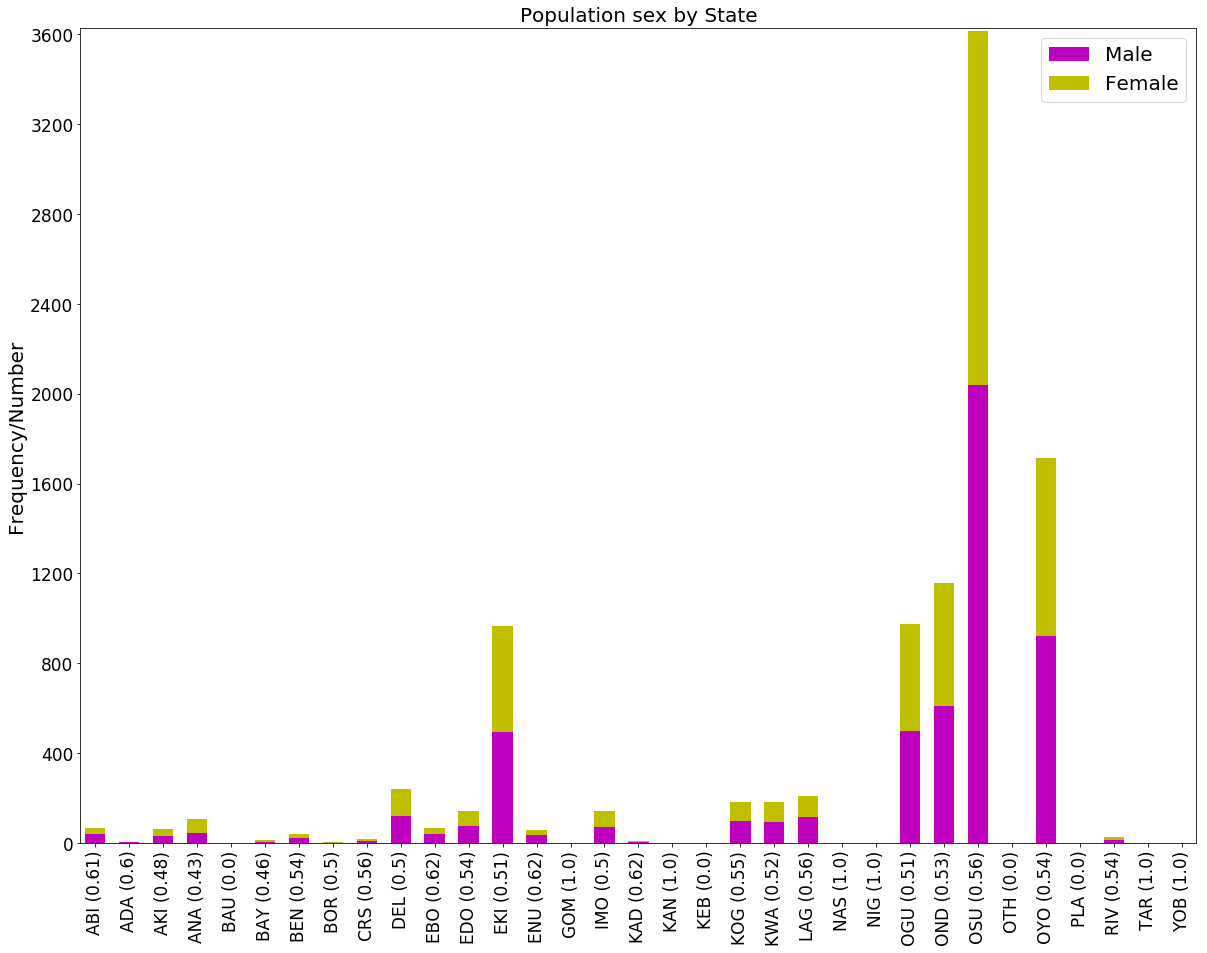

In [44]:
# Analysis based on States
N = 33
unique_state = np.unique(state, return_counts=True)
state_freq = unique_state[1]
unique_state = unique_state[0]
ind = np.arange(N)
width = 0.6  

# putme_male = sex == 'M'

state_male = []

for one_state in unique_state:
    state_male.append(len(np.extract((sex == 'M')\
                                   & (state == one_state), score)))
state_male = np.array(state_male)

state_prop = (state_male/state_freq)
mylist = []
i = 0
for athing in unique_state:
    mylist.append(athing + ' (' + str(round(state_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(20,15))
p1 = plt.bar(ind, state_male, width, color='m')
p2 = plt.bar(ind, state_freq-state_male, width,
             bottom=state_male, color='y')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by State', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=17)
plt.yticks(np.arange(0, 4001, 400), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.margins(x=0.004,y=0.004)
plt.show()

In [45]:
# Frequency of candidates from each state
x = pt()
x.field_names = ["State", "No of Candidates"]
unique_state = np.unique(state, return_counts=True)
unique_state = np.column_stack(unique_state)
for row in unique_state:
    x.add_row(row)

print(x)

+-------+------------------+
| State | No of Candidates |
+-------+------------------+
|  ABI  |        67        |
|  ADA  |        5         |
|  AKI  |        63        |
|  ANA  |       105        |
|  BAU  |        1         |
|  BAY  |        13        |
|  BEN  |        41        |
|  BOR  |        2         |
|  CRS  |        18        |
|  DEL  |       242        |
|  EBO  |        65        |
|  EDO  |       140        |
|  EKI  |       967        |
|  ENU  |        58        |
|  GOM  |        1         |
|  IMO  |       141        |
|  KAD  |        8         |
|  KAN  |        1         |
|  KEB  |        1         |
|  KOG  |       181        |
|  KWA  |       180        |
|  LAG  |       207        |
|  NAS  |        1         |
|  NIG  |        1         |
|  OGU  |       975        |
|  OND  |       1157       |
|  OSU  |       3616       |
|  OTH  |        1         |
|  OYO  |       1714       |
|  PLA  |        1         |
|  RIV  |        26        |
|  TAR  |     

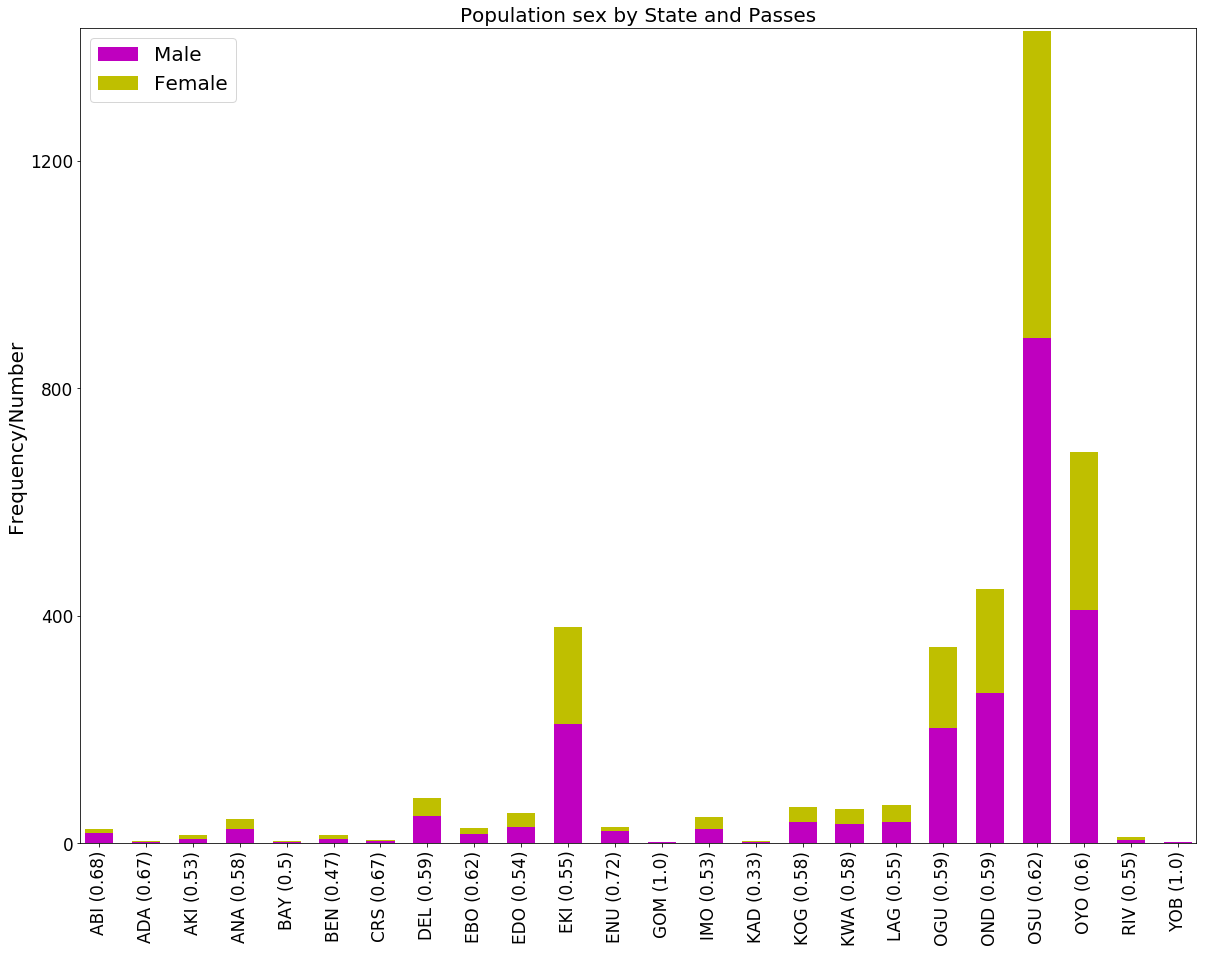

In [46]:
# Analysis based on States
N = 24
state_pass = state[score >= 20]
unique_state = np.unique(state_pass, return_counts=True)
state_freq = unique_state[1]
unique_state = unique_state[0]
ind = np.arange(N)
width = 0.6  

state_male = []

for one_state in unique_state:
    state_male.append(len(np.extract((sex == 'M')\
       & (state == one_state) & (score >= 20), score)))
state_male = np.array(state_male)

state_prop = (state_male/state_freq)
mylist = []
i = 0
for athing in unique_state:
    mylist.append(athing + ' (' + str(round(state_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(20,15))
p1 = plt.bar(ind, state_male, width, color='m')
p2 = plt.bar(ind, state_freq-state_male, width,
             bottom=state_male, color='y')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by State and Passes', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=17)
plt.yticks(np.arange(0, 4001, 400), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.margins(x=0.004,y=0.004)
plt.show()

In [47]:
# Analysis based on States
N = 33
unique_state = np.unique(state, return_counts=True)
state_freq = unique_state[1]
unique_state = unique_state[0]
ind = np.arange(N)
width = 0.6  


In [50]:
n_subj = np.unique(np.array(np.unique(subj1).tolist()\
 + np.unique(subj2).tolist() + np.unique(subj3).tolist()\
 + np.unique(subj4).tolist()), return_counts=True)
n_subj = np.array(np.sort(n_subj))
x = pt()
x.add_column("Subject", n_subj[0][:11])
y = pt()
y.add_column("Subject", n_subj[0][11:])
print(y)

+---------+
| Subject |
+---------+
|   GOV   |
|   HIS   |
|   H_E   |
|   IRS   |
|   LIT   |
|   MAT   |
|   MUS   |
|   PHY   |
|   P_A   |
|   YOR   |
+---------+


In [25]:
n_subj = np.column_stack(n_subj)
for row in n_subj:
    n = len(np.extract(subj1 == row[0], score))\
    + len(np.extract(subj2 == row[0], score))\
    + len(np.extract(subj3 == row[0], score))\
    + len(np.extract(subj4 == row[0], score))
    row[1] = n
x = pt()
x.field_names = ["Subject", "No of Candidates"]
for row in n_subj:
    x.add_row(row)

print(x)    

+---------+------------------+
| Subject | No of Candidates |
+---------+------------------+
|   AGR   |        96        |
|   ARA   |        2         |
|   ART   |        20        |
|   BIO   |       5503       |
|   CHE   |       7406       |
|   COM   |       117        |
|   CRS   |       830        |
|   ECO   |       1418       |
|   ENG   |      10001       |
|   FRE   |        12        |
|   GEO   |       302        |
|   GOV   |       1496       |
|   HIS   |        2         |
|   H_E   |        1         |
|   IRS   |        65        |
|   LIT   |       1009       |
|   MAT   |       3469       |
|   MUS   |        8         |
|   PHY   |       7469       |
|   P_A   |       744        |
|   YOR   |        34        |
+---------+------------------+


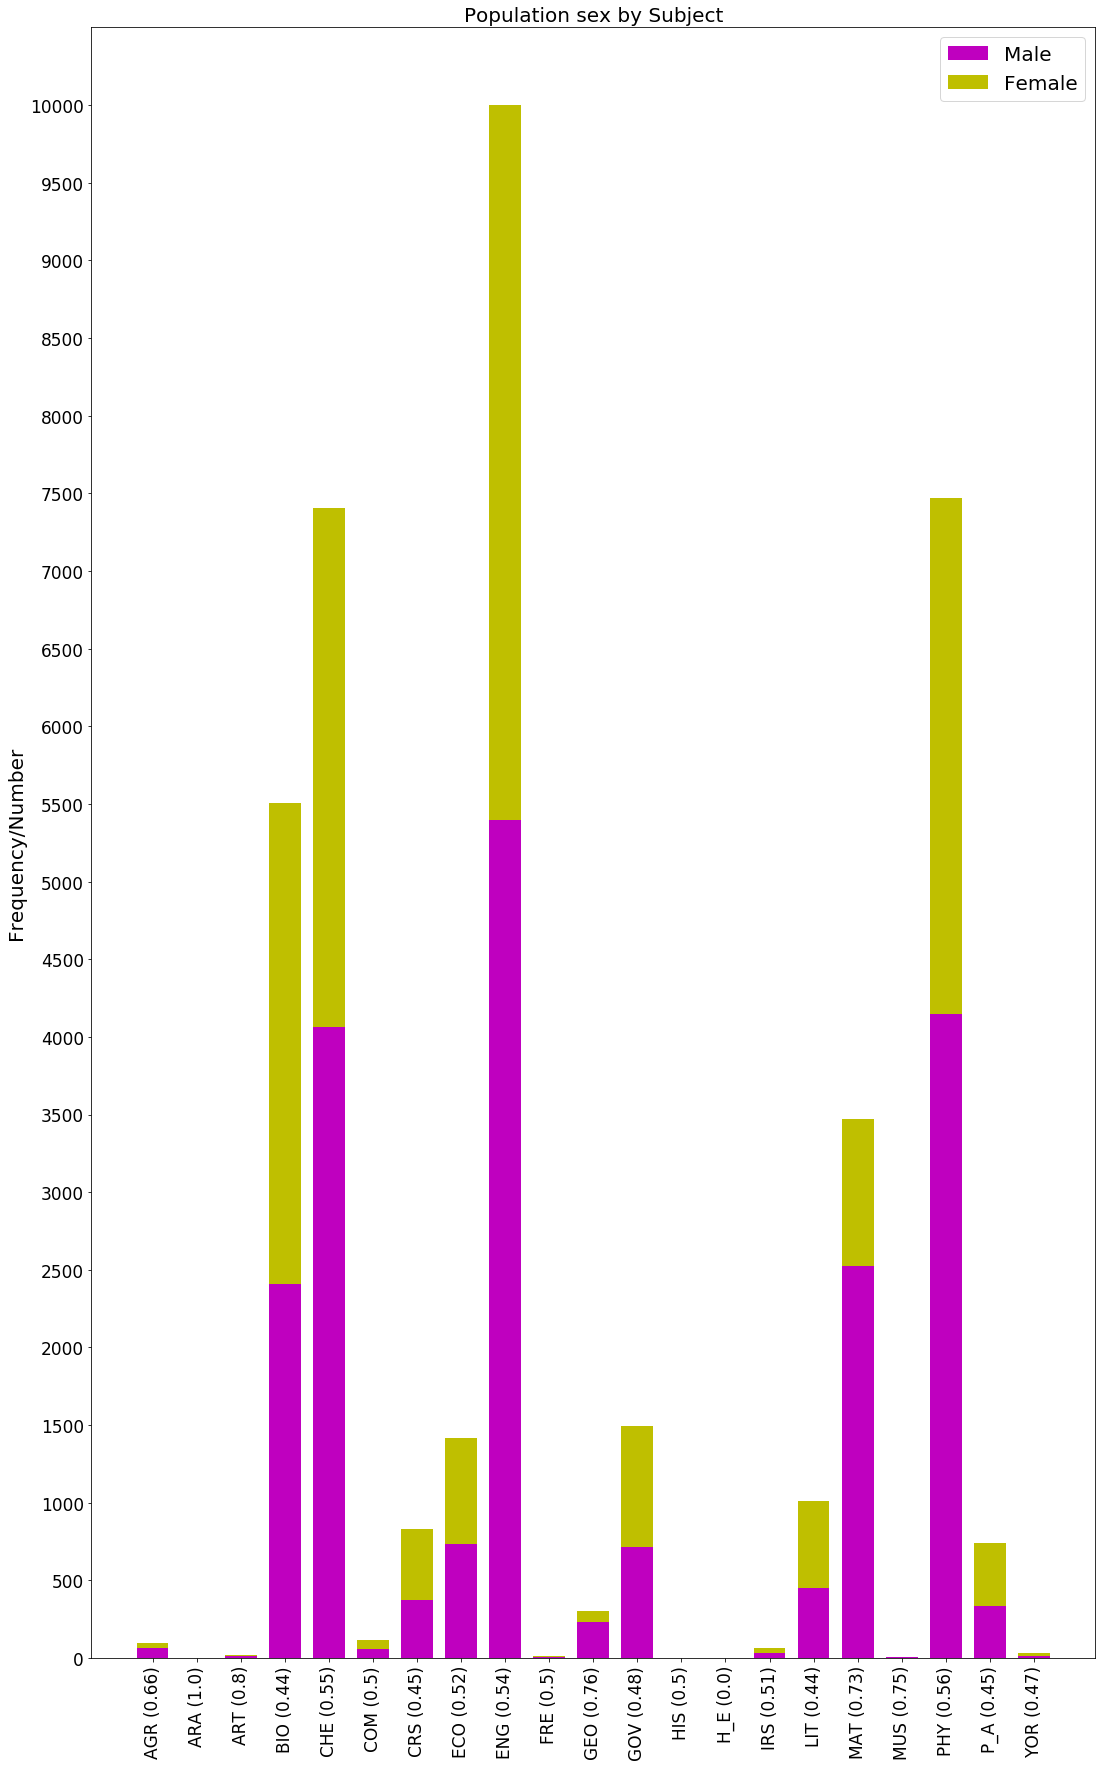

In [26]:
# Plotted on a stacked bar graph
N = len(n_subj)
ind = np.arange(N)
width = 0.72 

subj_male = []
for row in n_subj:
    n = len(np.extract((subj1 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj2 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj3 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj4 == row[0]) & (sex == 'M'), score))
    subj_male.append(n)

i = 0
subj_prop = subj_male/np.asarray(np.column_stack(n_subj)[1], dtype='int')
mylist = []
for athing in np.column_stack(n_subj)[0]:
    mylist.append(athing + ' (' + str(round(subj_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(18,30))
p1 = plt.bar(ind, subj_male, width, color='m')
p2 = plt.bar(ind,\
   np.asarray(np.column_stack(n_subj)[1], dtype='int')-subj_male, width,\
   bottom=subj_male, color='y')


plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by Subject', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=17)
plt.yticks(np.arange(0, 10001, 500), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.show()

In [87]:
print(np.asarray(np.column_stack(n_subj)[1], dtype='int'))

[   96     2    20  5503  7406   117   830  1418 10001    12   302  1496
     2     1    65  1009  3469     8  7469   744    34]


In [27]:
N = len(n_subj)
ind = np.arange(N)
width = 0.72 

subj_male = []
for row in n_subj:
    n = len(np.extract((subj1 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj2 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj3 == row[0]) & (sex == 'M'), score))\
    + len(np.extract((subj4 == row[0]) & (sex == 'M'), score))
    subj_male.append(n)

i = 0
subj_prop = subj_male/np.asarray(np.column_stack(n_subj)[1], dtype='int')
mylist = []
for athing in np.column_stack(n_subj)[0]:
    mylist.append(athing + ' (' + str(round(subj_prop[i], 2)) + ')')
    i += 1
    
print(subj_male)
print(mylist)
print(n_subj)

[63, 2, 16, 2408, 4063, 59, 376, 737, 5396, 6, 229, 715, 1, 0, 33, 449, 2522, 6, 4150, 337, 16]
['AGR (0.66)', 'ARA (1.0)', 'ART (0.8)', 'BIO (0.44)', 'CHE (0.55)', 'COM (0.5)', 'CRS (0.45)', 'ECO (0.52)', 'ENG (0.54)', 'FRE (0.5)', 'GEO (0.76)', 'GOV (0.48)', 'HIS (0.5)', 'H_E (0.0)', 'IRS (0.51)', 'LIT (0.44)', 'MAT (0.73)', 'MUS (0.75)', 'PHY (0.56)', 'P_A (0.45)', 'YOR (0.47)']
[['AGR' '96']
 ['ARA' '2']
 ['ART' '20']
 ['BIO' '5503']
 ['CHE' '7406']
 ['COM' '117']
 ['CRS' '830']
 ['ECO' '1418']
 ['ENG' '10001']
 ['FRE' '12']
 ['GEO' '302']
 ['GOV' '1496']
 ['HIS' '2']
 ['H_E' '1']
 ['IRS' '65']
 ['LIT' '1009']
 ['MAT' '3469']
 ['MUS' '8']
 ['PHY' '7469']
 ['P_A' '744']
 ['YOR' '34']]


In [94]:
print(subj_prop)

[0.65625    1.         0.8        0.4375795  0.54860924 0.5042735
 0.45301205 0.51974612 0.53954605 0.5        0.75827815 0.47794118
 0.5        0.         0.50769231 0.44499504 0.72701067 0.75
 0.55562994 0.45295699 0.47058824]


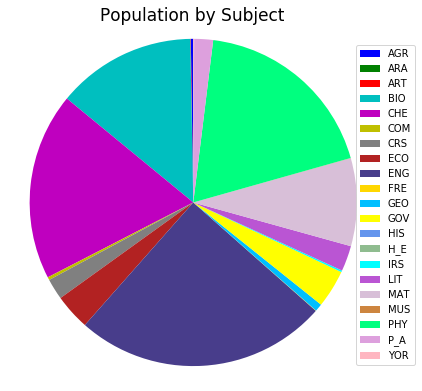

In [28]:
# Population that sat for the various subjects
labels = np.column_stack(n_subj)[0]
sizes = np.column_stack(n_subj)[1]
cls = ['b', 'g', 'r', 'c', 'm', 'y', 'gray', 'firebrick',
       'darkslateblue', 'gold', 'deepskyblue', 'yellow',
       'cornflowerblue', 'darkseagreen', 'aqua', 'mediumorchid',
       'thistle', 'peru', 'springgreen', 'plum', 'lightpink', 'k']
 
# Plot
patches, texts = plt.pie(sizes, colors=cls, shadow=False, startangle=90)
plt.legend(patches, labels, loc='center right', fontsize=10,\
           bbox_to_anchor=(0, 0, 1, 1), bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.title('Population by Subject', fontsize=17)
fig = plt.gcf()
fig.set_size_inches(6.5,6.5)
plt.show()

In [104]:
print(cls)

NameError: name 'cls' is not defined

In [122]:
print(labels)
print(sizes)

['AGR' 'ARA' 'ART' 'BIO' 'CHE' 'COM' 'CRS' 'ECO' 'ENG' 'FRE' 'GEO' 'GOV'
 'HIS' 'H_E' 'IRS' 'LIT' 'MAT' 'MUS' 'PHY' 'P_A' 'YOR']
['96' '2' '20' '5503' '7406' '117' '830' '1418' '10001' '12' '302' '1496'
 '2' '1' '65' '1009' '3469' '8' '7469' '744' '34']


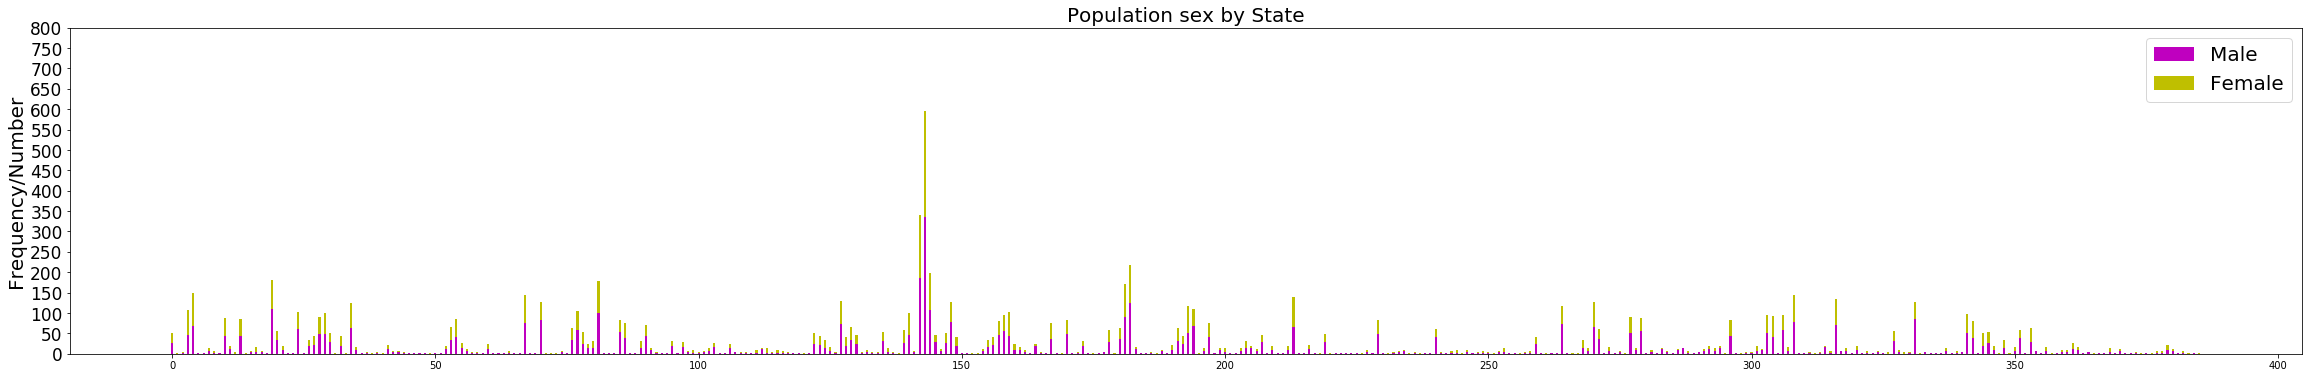

In [29]:
# Analysis based on LGA
unique_lga = np.unique(lga, return_counts=True)
# print(unique_lga)
lga_freq = unique_lga[1]
unique_lga = unique_lga[0]
N = len(unique_lga)
ind = np.arange(N)
width = 0.4  

# putme_male = sex == 'M'

lga_male = []

for one_lga in unique_lga:
    lga_male.append(len(np.extract((sex == 'M')\
                                   & (lga == one_lga), score)))
lga_male = np.array(lga_male)

lga_prop = (lga_male/lga_freq)
mylist = []
i = 0
for athing in unique_lga:
    mylist.append(athing + ' (' + str(round(lga_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(40,6))
p1 = plt.bar(ind, lga_male, width, color='m')
p2 = plt.bar(ind, lga_freq-lga_male, width,
             bottom=lga_male, color='y')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by State', fontsize=20)
# plt.xticks(ind, mylist, rotation='vertical', fontsize=11)
plt.yticks(np.arange(0, 801, 50), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)

plt.show()

In [30]:
#print('\x1b[1;31m')
print(len(unique_lga))
#print('\x1b[0m')

386


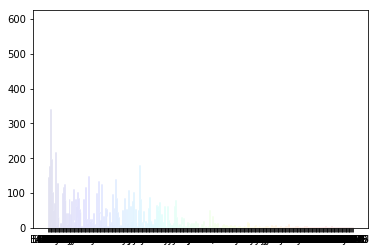

In [132]:
# Colored Histogram
d = np.diff(np.unique(score)).min()
score_lower = score.min() - float(d) / 2
score_upper = score.max() + float(d) / 2
bins = np.arange(score_lower, score_upper + d, d)
fig, lga_plot = plt.subplots()
N, bins, patches = lga_plot.hist(lga, bins=len(unique_lga), edgecolor='white',\
                                 linewidth=.8)
palette = pl.get_cmap('jet', len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(palette(i))

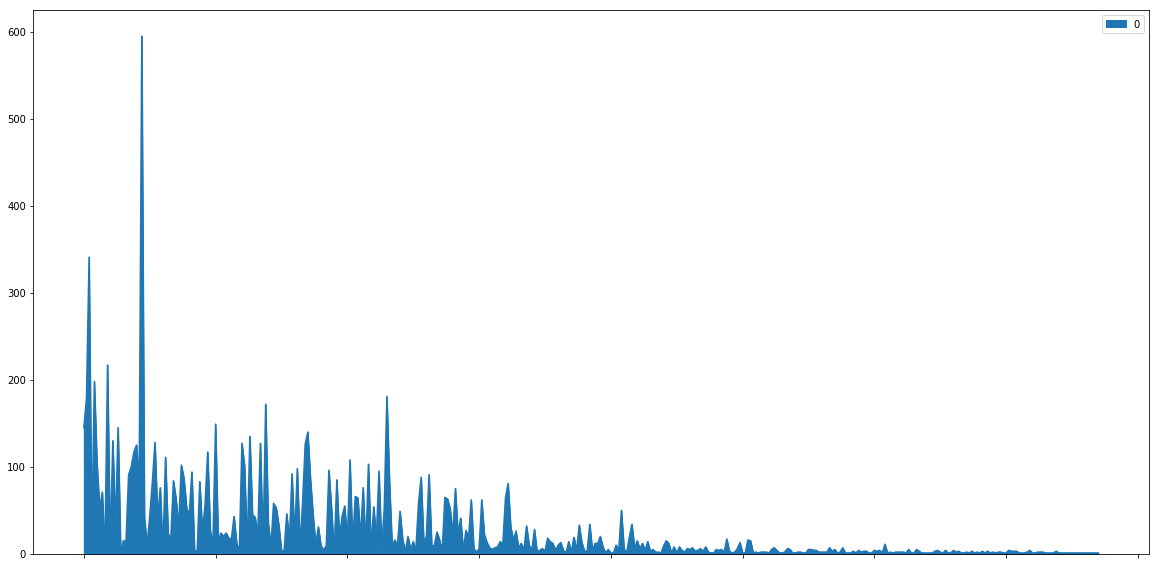

In [135]:
#import pandas
from collections import Counter as ct
# lga <> a = ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e', 'e']
# letter_counts = Counter(a)
lga_count = ct(lga)
df = pd.DataFrame.from_dict(lga_count, orient='index')
df.plot(kind='area', figsize=(20,10))

In [133]:
print(pd)

<module 'pandas' from '/home/cslab/anaconda3/lib/python3.7/site-packages/pandas/__init__.py'>


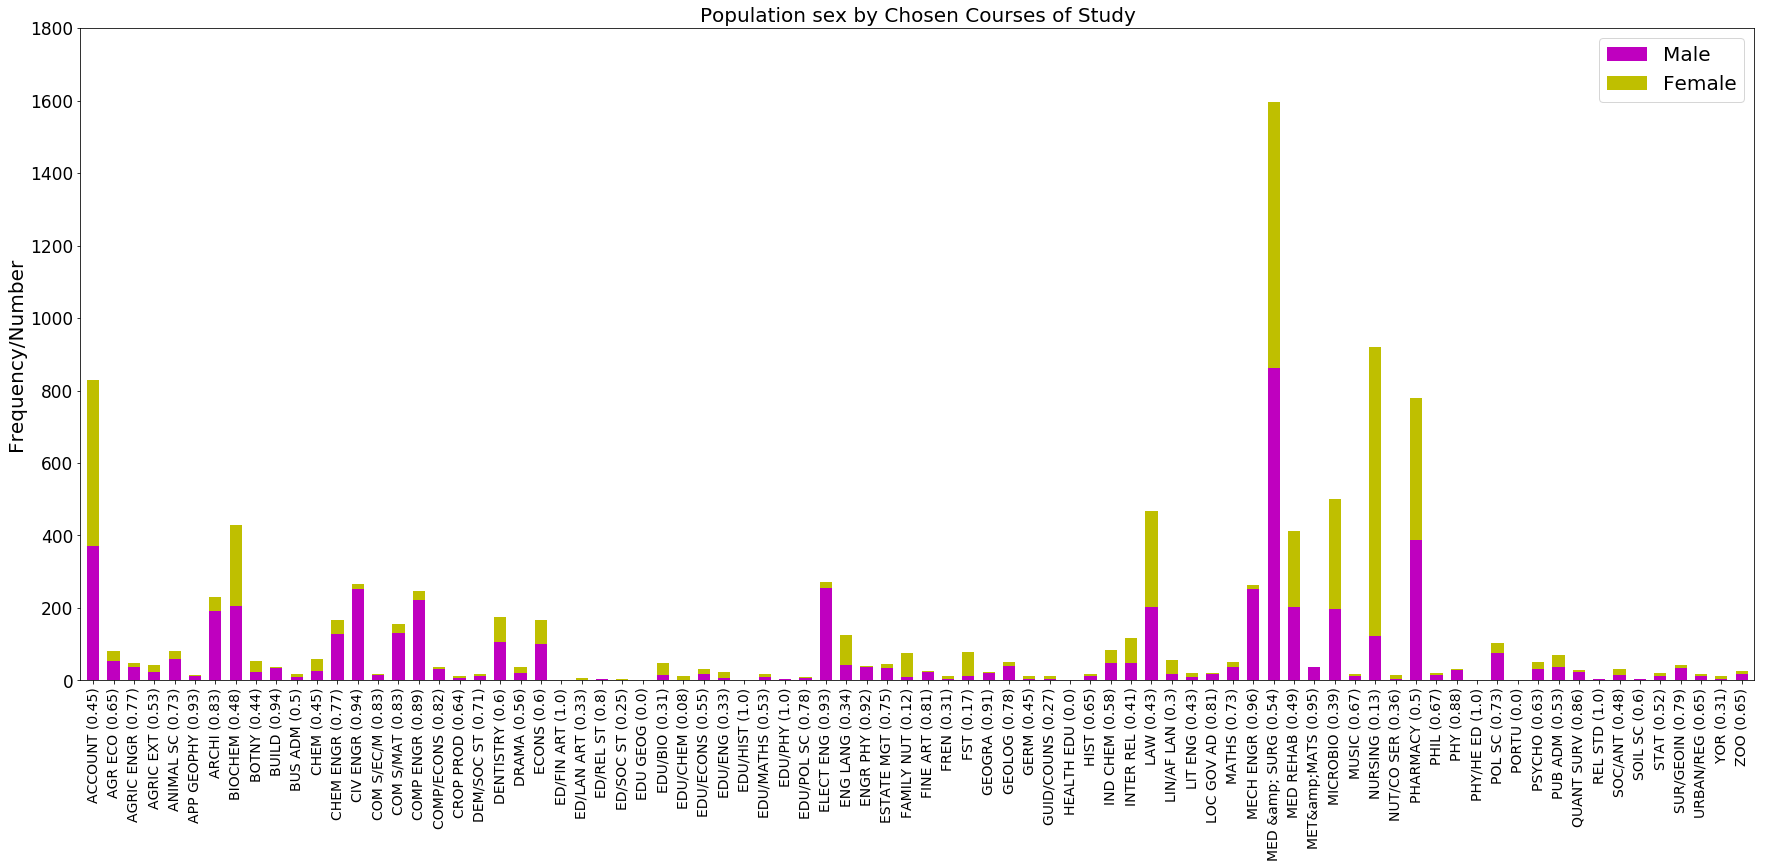

In [5]:
# Analysis based on Selected Courses of Study
unique_course = np.unique(course, return_counts=True)
course_freq = unique_course[1]
unique_course = unique_course[0]
N = len(unique_course)
ind = np.arange(N)
width = 0.6  

# putme_male = sex == 'M'

course_male = []

for one_course in unique_course:
    course_male.append(len(np.extract((sex == 'M')\
                                   & (course == one_course), score)))
course_male = np.array(course_male)

course_prop = (course_male/course_freq)
mylist = []
i = 0
for athing in unique_course:
    mylist.append(athing + ' (' + str(round(course_prop[i], 2)) + ')')
    i += 1

plt.figure(figsize=(30,12))
p1 = plt.bar(ind, course_male, width, color='m')
p2 = plt.bar(ind, course_freq-course_male, width,
             bottom=course_male, color='y')

plt.ylabel('Frequency/Number', fontsize=20)
plt.title('Population sex by Chosen Courses of Study', fontsize=20)
plt.xticks(ind, mylist, rotation='vertical', fontsize=14)
plt.yticks(np.arange(0, 1801, 200), fontsize=17)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=20)
plt.margins(x=0.004)
plt.show()

In [15]:
print((unique_course))

['ACCOUNT' 'AGR ECO' 'AGRIC ENGR' 'AGRIC EXT' 'ANIMAL SC' 'APP GEOPHY'
 'ARCHI' 'BIOCHEM' 'BOTNY' 'BUILD' 'BUS ADM' 'CHEM' 'CHEM ENGR' 'CIV ENGR'
 'COM S/EC/M' 'COM S/MAT' 'COMP ENGR' 'COMP/ECONS' 'CROP PROD'
 'DEM/SOC ST' 'DENTISTRY' 'DRAMA' 'ECONS' 'ED/FIN ART' 'ED/LAN ART'
 'ED/REL ST' 'ED/SOC ST' 'EDU GEOG' 'EDU/BIO' 'EDU/CHEM' 'EDU/ECONS'
 'EDU/ENG' 'EDU/HIST' 'EDU/MATHS' 'EDU/PHY' 'EDU/POL SC' 'ELECT ENG'
 'ENG LANG' 'ENGR PHY' 'ESTATE MGT' 'FAMILY NUT' 'FINE ART' 'FREN' 'FST'
 'GEOGRA' 'GEOLOG' 'GERM' 'GUID/COUNS' 'HEALTH EDU' 'HIST' 'IND CHEM'
 'INTER REL' 'LAW' 'LIN/AF LAN' 'LIT ENG' 'LOC GOV AD' 'MATHS' 'MECH ENGR'
 'MED &amp; SURG' 'MED REHAB' 'MET&amp;MATS' 'MICROBIO' 'MUSIC' 'NURSING'
 'NUT/CO SER' 'PHARMACY' 'PHIL' 'PHY' 'PHY/HE ED' 'POL SC' 'PORTU'
 'PSYCHO' 'PUB ADM' 'QUANT SURV' 'REL STD' 'SOC/ANT' 'SOIL SC' 'STAT'
 'SUR/GEOIN' 'URBAN/REG' 'YOR' 'ZOO']


In [20]:
x = pt()
x.field_names = ["S/N", "Course", "Freq"]
i = 0
for row in unique_course:
  x.add_row([str(i+1), row, course_freq[i]])
  i += 1
  
print(x)

+-----+----------------+------+
| S/N |     Course     | Freq |
+-----+----------------+------+
|  1  |    ACCOUNT     | 829  |
|  2  |    AGR ECO     |  82  |
|  3  |   AGRIC ENGR   |  48  |
|  4  |   AGRIC EXT    |  43  |
|  5  |   ANIMAL SC    |  82  |
|  6  |   APP GEOPHY   |  14  |
|  7  |     ARCHI      | 231  |
|  8  |    BIOCHEM     | 428  |
|  9  |     BOTNY      |  54  |
|  10 |     BUILD      |  36  |
|  11 |    BUS ADM     |  18  |
|  12 |      CHEM      |  58  |
|  13 |   CHEM ENGR    | 166  |
|  14 |    CIV ENGR    | 267  |
|  15 |   COM S/EC/M   |  18  |
|  16 |   COM S/MAT    | 156  |
|  17 |   COMP ENGR    | 247  |
|  18 |   COMP/ECONS   |  38  |
|  19 |   CROP PROD    |  11  |
|  20 |   DEM/SOC ST   |  17  |
|  21 |   DENTISTRY    | 175  |
|  22 |     DRAMA      |  36  |
|  23 |     ECONS      | 167  |
|  24 |   ED/FIN ART   |  1   |
|  25 |   ED/LAN ART   |  6   |
|  26 |   ED/REL ST    |  5   |
|  27 |   ED/SOC ST    |  4   |
|  28 |    EDU GEOG    |  1   |
|  29 | 

In [ ]:
n_subj = np.unique(np.array(np.unique(subj1).tolist()\
 + np.unique(subj2).tolist() + np.unique(subj3).tolist()\
 + np.unique(subj4).tolist()), return_counts=True)
n_subj = np.array(np.sort(n_subj))
x = pt()
x.add_column("Subject", n_subj[0])

print(x)

In [ ]:
n_subj = np.column_stack(n_subj)
for row in n_subj:
    n = len(np.extract(subj1 == row[0], score))\
    + len(np.extract(subj2 == row[0], score))\
    + len(np.extract(subj3 == row[0], score))\
    + len(np.extract(subj4 == row[0], score))
    row[1] = n
x = pt()
x.field_names = ["Subject", "No of Candidates"]
for row in n_subj:
    x.add_row(row)

print(x)    